In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

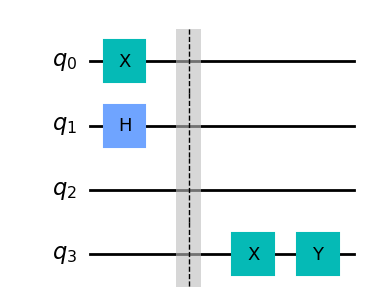

In [37]:
# Make a quantum circuit (QC) with 4 qubits, that
# qubit No. 0 has gate X, 
# qubit No. 1 has gate H,
# then add a barrier, 
# qubit No. 2 doesn't have any gates,
# qubit No. 3 has first gate X and then gate Y 

# NOTE (1) : a ".barrier()" is a seperating vertical line that helps visualization. 
#            By includinf the parameter "label = <string>", a name shall appear above the barrier. 
#            A barrier has no effect on circuit's functionality, 
#            it is only for visualization purposes. 

# NOTE (2) : The Payli X gate or simply X Gate (also reffered as NOT - Gate), 
#            is applied in a circuit as ".x(qubit_number)".
#            It rotates qubits' direction on Bloch Shere 180 degree on X axis. 

# NOTE (3) : The Pauli Y gate or simply Y gate, 
#            is applied in a circuit as ".y(qubit_number)".
#            It rotates qubits' direction on Bloch Shere 180 degree on Y axis. 

# NOTE (4) : The Pauli Z gate or simply Z Gate,
#            is applied in a circuit as ".z(qubit_number)".
#            It rotates qubits' direction on Bloch Shere 180 degree on Z axis. 

# NOTE (5) : The Hadamard gate or H Gate, 
#            is applied in a circuit as ".h(qubit_number)".
#            It rotates qubits' direction on Bloch Shere 180 degrees 
#            around the axis that lies halfway between the X and Z axes.

qc = QuantumCircuit(4, 0)  # the "0" in the number of bits parameter is optional. 
                           # Not including a second parameter, means 0 classical bits by default.

qc.x(0)                    # add gate X to qubit 0
qc.h(1)                    # add gate H to qubit 1
qc.barrier()               # add a barrier
qc.x(3)                    # add gate H to qubit 3
qc.y(3)                    # add gate Y to qubit 3
qc.draw()                  

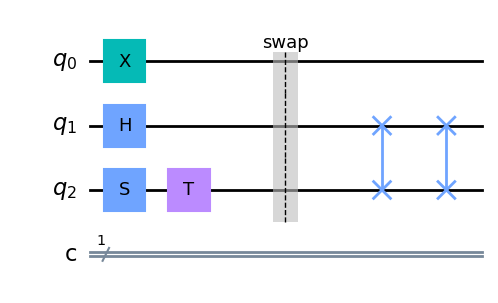

In [47]:
# Make a quantum circuit (QC) with 3 qubits and 1 classical bit, that
# qubit No. 0 has gate X,
# qubit No. 1 has gate H,
# qubit No. 2 has gate S, and then a T gate, 
# after adding these gates, put a barrier
# and swap qubit No.1 with qubit No. 2
# and then swap qubit No.2 with qubit No. 1


# NOTE (1) : The S gate, 
#            is applied in a circuit as ".s(qubit_number)".
#            It rotates qubits' direction on Bloch Shere 90 degree on Z axis. 

# NOTE (2) : The T gate, 
#            is applied in a circuit as ".t(qubit_number)".
#            It rotates qubits' direction on Bloch Shere 45 degree on Z axis. 

# NOTE (3) : The SWAP gate, 
#            is applied in a circuit as ".swap(qubit1, qubit2)".
#            It exchanges the states of two qubits, effectively swapping their quantum information.
#            --> Note that "swap(a,b)" is the same as applying "swap(b,a)". 

qc = QuantumCircuit(3, 1)     
qc.x(0)                    
qc.h(1) 
qc.s(2)                        # add gate S to qubit 3
qc.t(2)                        # add gate T to qubit 3
qc.barrier(label = "swap")     # add a barrier with the name "swap"
qc.swap(1, 2)                  # swapping qubits No. 1 and No. 2
qc.swap(2, 1)                  # swapping qubits No. 2 and No. 1
qc.draw()                  

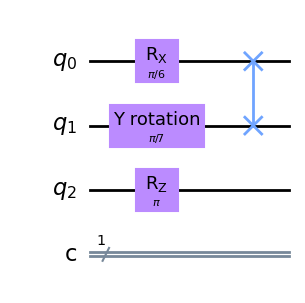

In [52]:
# Make a quantum circuit (QC) with 2 qubits, that
# qubit No. 0 rotate it pi/6 degree on X axis,
# qubit No. 1 rotate it pi/7 degree on Y axis, with the name "Y rotation"
# qubit No. 2 rotate it pi degree on Z axis, using the .rz() and not the .z method, 
# and swap qubit 1 with 0


# NOTE (1) : It is useful to import numpy library, to access the pi value. 

# NOTE (2) : The ".rx(theta, qubit_no label = None)" method
#            rotates a qubit by theta degrees on X axis. 
#            The "label" parameter is optional and is used to name that gate/ rotation. 

# NOTE (3) : The ".ry(theta, qubit_no label = None)" method
#            rotates a qubit by theta degrees on Y axis. 
#            The "label" parameter is optional and is used to name that gate/ rotation. 

# NOTE (4) : The ".rz(theta, qubit_no label = None)" method
#            rotates a qubit by theta degrees on Z axis. 
#            The "label" parameter is optional and is used to name that gate/ rotation. 

import numpy as np               # importing numpy to access the pi value
pi = np.pi 

qc = QuantumCircuit(3, 1)     
qc.rx(pi/6, 0)                    # rotates qubit pi/6 degrees on X axis    
qc.ry(pi/7, 1, 'Y rotation')      # rotates qubit pi/7 degrees on Y axis - named "rotation"
qc.rz(pi, 2)                      # rotates qubit pi degrees on Z axis
                                  # same as applying .z() when on pi degrees
qc.swap(0,1)
qc.draw()                  

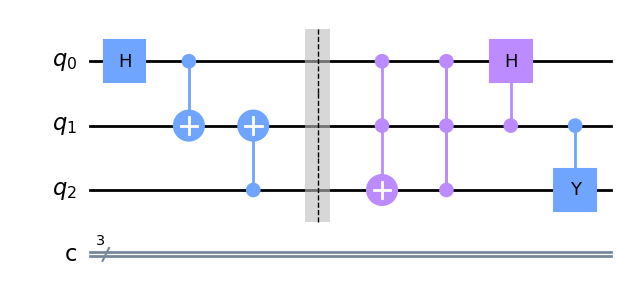

In [28]:
# Make a quantum circuit (QC) with 3 qubits and 3 bits, that
# adds to qubit No.0 has an H gate, 
# adds a Controlled X gate (CNOT) with qubit No.0 in control and No.1 as target.
# adds a Controlled X gate (CNOT) with qubit No.2 in control and No.1 as target.
# adds a barrier. 
# adds a CC-NOT gate with qubit No.0, No.1 in control and No.2 as target.
# adds a CCZ gate with qubit No.0, No.1 in control and No.2 as target.
# adds a Controlled H gate (CH) with qubit No.1 in control and No.0 as target.
# Lastly, add an Y gate to qubit No.1.

# NOTE (1) : The Controlled - X gate or C-NOT gate, 
#            is applied with .cx(contr_qubit, targ_qubit)
#            OR with .cnot(contr_qubit, targ_qubit).
#            in which, the first parameter is the qubit in control, and
#                      the second paramenter is the target qubit. 
#            If control qubit is 1, then an X gate is applied to target qubit. 

# NOTE (2) : The Toffoli Gate or Controlled - Controlled - X gate or CC-NOT gate, 
#            is applied with .ccx(contr_qubit_1, contr_qubit_2, targ_qubit)
#            in which, the first parameter is the qubit in control, 
#                      the second paramenter is alse a qubit in control, and 
#                      the third (last) paramenter is the target qubit. 
#            If both of the control qubits is 1, then an X gate is applied to target qubit. 

# NOTE (3) : The Controlled - Controlled - Z gate or CCZ gate, 
#            is applied with .ccz(contr_qubit_1, contr_qubit_2, targ_qubit)
#            in which, the first parameter is the qubit in control, 
#                      the second paramenter is alse a qubit in control, and 
#                      the third (last) paramenter is the target qubit. 
#            If both of the control qubits is 1, then an Z gate is applied to target qubit. 
#            --> Observe that no "target" icon is shown with the ".draw()" method. 

# NOTE (4) : The Controlled - H gate or CH gate, 
#            is applied with .ch(contr_qubit, targ_qubit)
#            in which, the first parameter is the qubit in control, and
#                      the second paramenter is the target qubit. 
#            If control qubit is 1, then an H gate is applied to target qubit. 

# NOTE (5) : The Controlled - Y gate or CY gate, 
#            is applied with .cy(contr_qubit, targ_qubit)
#            in which, the first parameter is the qubit in control, and
#                      the second paramenter is the target qubit. 
#            If control qubit is 1, then an Y gate is applied to target qubit. 

qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cx(0, 1)                  # CNOT: control qubit is No. 0, target qubit is No. 1 
qc.cnot(2,1)                 # CNOT: control qubit is No. 2, target qubit is No. 1 
                             # the ".cx(q,q)" is the same as ".cnot(q,q)"
qc.barrier()
qc.ccx(0,1,2)                # CCNOT: if qubits in control (No. 0,1) are "1", 
                             #        put an X gate to target qubit (No. 2)
qc.ccz(0,1,2)                # CCZ: if qubits in control (No. 0,1) are "1", 
                             #        put a Z gate to target qubit (No. 2)
                             # --> Observe that no "target" icon is shown with the ".draw()" method. 
qc.ch(1,0)                   # CH: control qubit is No. 1, target qubit is No. 0 
qc.cy(1,2)                   # CY: control qubit is No. 1, target qubit is No. 2 
qc.draw()